# Short guide how to use pycocotools

In [2]:
from pycocotools.coco import COCO
import cv2
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline

## Download the data

First, download the data from sourse:
http://cocodataset.org/#download.
We will get annotations2017 and train2017.

Then unpack annotations into "annotations/" folder and train into "train2017/".

## Load annotations from file

In [3]:
annfile = 'annotations/instances_train2017.json'
images_dir = 'train2017/'

coco = COCO(annfile)

loading annotations into memory...
Done (t=10.13s)
creating index...
index created!


# Get categories that you want

Imagine it's necessary for you to detect trains. So you need to extract information only about the trains. Then first load the category that you need:

In [4]:
catIds = coco.getCatIds(catNms=['train'])

## Get pictures

In [5]:
imgIds = coco.getImgIds(catIds=catIds)

Let's have a look on our photos! We will take as an example the first one.

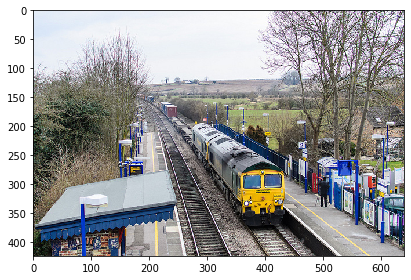

In [14]:
imgId = imgIds[0]
annIds = coco.getAnnIds(imgIds=imgId, catIds=catIds)
ann = coco.loadAnns(annIds)
imgs = coco.loadImgs(imgId)
img_name = imgs[0]['file_name']
img = imread(images_dir + img_name)

imshow(img)

## Extract bounding boxes

Allright! When we solve Object Detection tasks, we need to extract bounding boxes. Let's draw them.

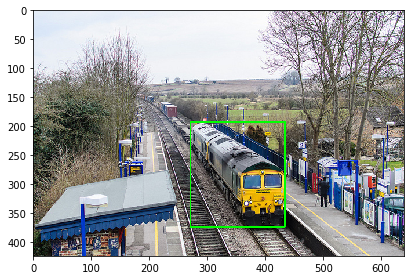

In [15]:
bbox = ann[0]['bbox']
x, y, w, h = bbox
x, y, w, h = int(x), int(y), int(w), int(h)

bbox_img = img.copy() 
cv2.rectangle(bbox_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
imshow(bbox_img)

## Extract masks

When we solve Segmentation problems, fox example, Semantic Segmentation or Instance Segmentation, we need contours masks.

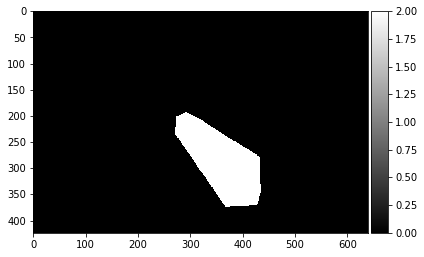

In [42]:
mask = coco.annToMask(ann[0])
for i in range(len(ann)):
    mask += coco.annToMask(ann[i])
imshow(mask, cmap='gray')

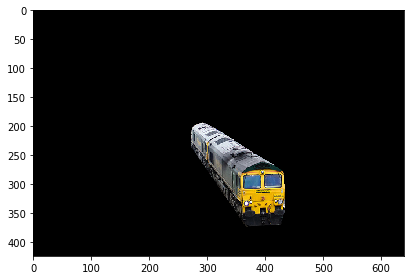

In [43]:
result = cv2.bitwise_and(img, img, mask=mask)
imshow(result)